In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [3]:
mart = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\ML project\Project_10\Train.csv')

In [4]:
mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
mart.shape

(8523, 12)

In [6]:
mart['Item_Weight'].mean()

np.float64(12.857645184135976)

In [7]:
mart['Item_Weight'].fillna(mart['Item_Weight'].mean(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_30768\1925428376.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mart['Item_Weight'].fillna(mart['Item_Weight'].mean(), inplace=True)


In [8]:
mode_of_Outlet_size = mart.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [9]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [10]:
miss_values = mart['Outlet_Size'].isnull() 

In [11]:
mart.loc[miss_values, 'Outlet_Size'] = mart.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [12]:
sns.set()

C:\Users\hp\AppData\Local\Temp\ipykernel_30768\4201313761.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart['Item_Weight'])


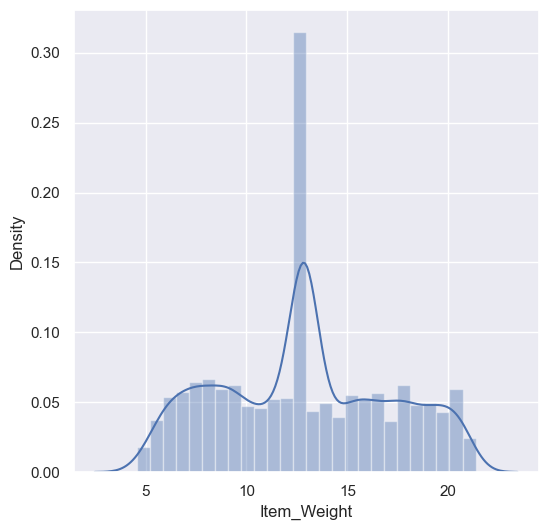

In [13]:
plt.figure(figsize=(6,6))
sns.distplot(mart['Item_Weight'])
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_30768\3887879099.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart['Item_Visibility'])


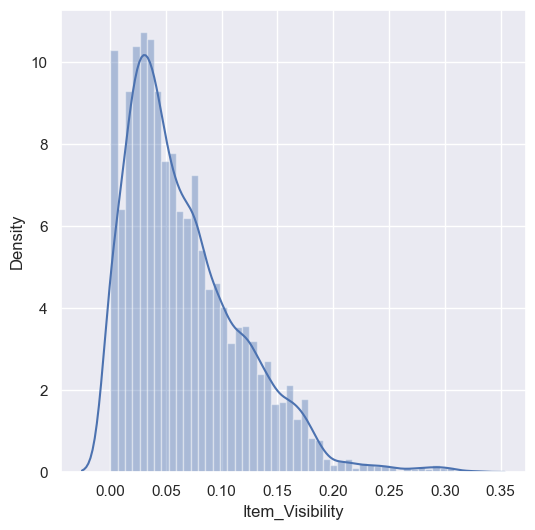

In [14]:
plt.figure(figsize=(6,6))
sns.distplot(mart['Item_Visibility'])
plt.show()

In [15]:
mart.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [16]:
encoder = LabelEncoder()

In [17]:
mart['Item_Identifier'] = encoder.fit_transform(mart['Item_Identifier'])

mart['Item_Fat_Content'] = encoder.fit_transform(mart['Item_Fat_Content'])

mart['Item_Type'] = encoder.fit_transform(mart['Item_Type'])

mart['Outlet_Identifier'] = encoder.fit_transform(mart['Outlet_Identifier'])

mart['Outlet_Size'] = encoder.fit_transform(mart['Outlet_Size'])

mart['Outlet_Location_Type'] = encoder.fit_transform(mart['Outlet_Location_Type'])

mart['Outlet_Type'] = encoder.fit_transform(mart['Outlet_Type'])

In [18]:
mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [19]:
X = mart.drop(columns='Item_Outlet_Sales', axis=1)
Y = mart['Item_Outlet_Sales']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [21]:
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
training_data_prediction = regressor.predict(X_train)

In [23]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [24]:
print('R Squared value = ', r2_train)

R Squared value =  0.8762174618111388


In [25]:
test_data_prediction = regressor.predict(X_test)

In [26]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [27]:
print('R Squared value = ', r2_test)

R Squared value =  0.5017253991620692
